- 重要参数
    - n_estimators

In [4]:
# 1.导入所需要的包
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [5]:
# 2.导入所需数据集
wine = load_wine()
# 特征
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
# 分类
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
# 3.建模
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)

clf = DecisionTreeClassifier(random_state=24)
rfc = RandomForestClassifier(random_state=24)
clf = clf.fit(xtrain, ytrain)
rfc = rfc.fit(xtrain, ytrain)
score_c = clf.score(xtest, ytest)
score_r = rfc.score(xtest, ytest)

print("Single Tree:{}".format(score_c),
      "\nRandom Forest:{}".format(score_r))

Single Tree:0.9629629629629629 
Random Forest:0.9814814814814815


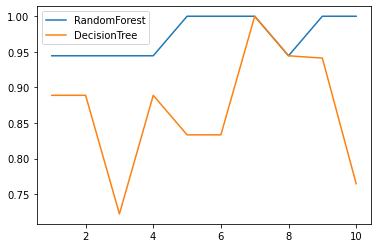

In [18]:
# 4.画出随机森林和决策树在一组交叉验证下的效果对比
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

plt.plot(range(1,11), rfc_s,label="RandomForest")
plt.plot(range(1,11), clf_s,label="DecisionTree")
plt.legend()
plt.show()

#代码的另一种方法
# label = "RandomForest"
# for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]:
#     score = cross_val_score(model, wine.data, wine.target, cv=10)
#     print("{}:".format(label)),print(score.mean())
#     plt.plot(range(1,11), score, label=label)
#     plt.legend()
#     label = "DecisionTree"
#     plt.show()


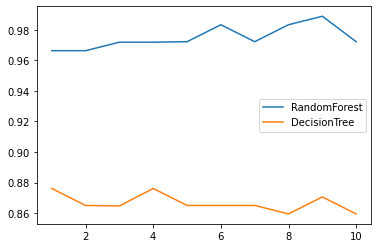

In [28]:
# 5.画出随机森林和决策树在十组交叉验证下的效果对比
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11), rfc_l,label="RandomForest")
plt.plot(range(1,11), clf_l,label="DecisionTree")
plt.legend()
plt.show()

0.9888888888888889 19


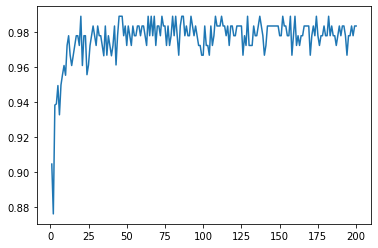

In [29]:
# 6.n_estimators的学习曲线
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    superpa.append(rfc_s)
    
print(max(superpa),superpa.index(max(superpa)))

plt.plot(range(1,201),superpa)
plt.show()

In [33]:
rfc = RandomForestClassifier(n_estimators=25, random_state=24)
rfc = rfc.fit(xtrain, ytrain)

#随机森林的重要属性之一：estimators，查看森林中树的状况

for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1975759266
1264583555
856897728
227008855
2146913681
1363601553
945181825
2078546276
1550725243
38739151
1030109188
1233432559
2132261091
2036034386
1358699915
509906811
586454499
1179518835
1649181583
257546471
1376619849
87222034
1573739383
706738567
900446617


## oob_score_

In [35]:
rfc = RandomForestClassifier(n_estimators=25, oob_score=True)
rfc = rfc.fit(wine.data, wine.target)

rfc.oob_score_

0.9606741573033708

## 重要属性

In [36]:
rfc.feature_importances_

array([0.16690397, 0.03424694, 0.01477709, 0.04116033, 0.0061899 ,
       0.03389767, 0.10000131, 0.01952006, 0.03771112, 0.14313288,
       0.12055666, 0.11893679, 0.16296528])

In [39]:
rfc.predict_proba(xtest)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.  , 0.08, 0.92],
       [0.96, 0.  , 0.04],
       [0.92, 0.08, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.96, 0.04, 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.08, 0.92],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.  , 1.  ],
       [0.04, 0.08, 0.88],
       [0.  , 1.  , 0.  ],
       [0.04, 0.  , 0.96],
       [0.04, 0.96, 0.  ],
       [0.  , 0.12, 0.88],
       [0.  , 0.8 , 0.2 ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
 

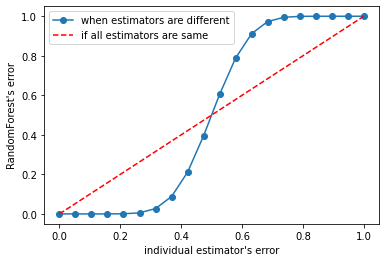

In [41]:
import numpy as np
from scipy.special import comb
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()


当基分类器的误差率小于0.5，即准确率大于0.5时，集成的效果是比基分类器要好的。相反，当基分类器的误差率大于0.5，袋装的集成算法就失效了